In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("ivory_coast.csv", encoding='ISO-8859-1')

from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# from statsmodels.genmod.generalized_linear_model import GLM
# import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import Ridge, Lasso



from scipy import stats

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm
from sklearn.impute import KNNImputer

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer




<ipython-input-2-cd8385031b8a>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [ ]:
df.head()
data = df.drop(['pcode_region', 'pcode_region.1', 'id_007_district', 'pcode_district', 'id_008_community_name', 'community_code'], axis = 1)

In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  for col in column:
    _ = sns.displot(data, x=col, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {col}');


In [ ]:
# def make_mi_scores(X, y):
#     X = X.copy()
#     for colname in X.select_dtypes(["object", "category"]):
#         X[colname], _ = X[colname].factorize()
#     # All discrete features should now have integer dtypes
#     discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
#     mi_scores_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
#     mi_scores_df = mi_scores_df.sort_values(by="MI Score", ascending=False).reset_index(drop=True)
#     return mi_scores_df

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores, color = 'black')
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores, color='black')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

    # Adjust y-axis visibility
    plt.gca().spines['left'].set_color('black')  # Set y-axis color
    plt.gca().spines['left'].set_linewidth(1.5)  # Set y-axis thickness

    # Add gridlines
    plt.grid(axis='x', linestyle='--', color='gray', linewidth=0.5)

    plt.show()


In [ ]:
cat = []
num = []
for i in data.columns.tolist():
    if data[i].nunique() == 2:
        cat.append(i)
    else:
        num.append(i)

In [ ]:
for i in cat:
    for j in range (len(data[i])):
        if data[i][j] == 1:
            data[i][j] = "Yes"
        if data[i][j] == 0:
            data[i][j] = "No"

In [ ]:
X = data.loc[:,data.columns != 'lcommp_clab']
y = data['lcommp_clab']


# Separate numerical variables from the DataFrame
numeric_cols = X.select_dtypes(include=['int', 'float']).columns.tolist()
X_numeric = X[numeric_cols].copy()

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor()

# Create an imputer with the Random Forest regressor
imputer = IterativeImputer(estimator=rf_regressor)

# Impute missing values in the numerical variables
X_numeric_imputed = imputer.fit_transform(X_numeric)

# Convert the imputed numerical variables back to a DataFrame
X_imputed = pd.DataFrame(X_numeric_imputed, columns=numeric_cols)



In [ ]:
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

casualwork_cost        42
CED_N_gch_prim         16
CED_N_bch_prim         16
CED_N_ch_primotherc    16
CED_N_gch_prim1        16
CED_N_bch_prim1        16
CED_N_ch_prim1         16
CED_N_cl_prim1         16
CED_N_gch_prim2        16
CED_N_bch_prim2        16
CED_N_ch_prim2         16
CED_N_cl_prim2         16
CED_N_gch_prim3        16
CED_N_bch_prim3        16
CED_N_ch_prim3         16
CED_N_cl_prim3         16
CED_N_gch_prim4        16
CED_N_bch_prim4        16
CED_N_ch_prim4         16
CED_N_cl_prim4         16
CED_N_gch_prim5        16
CED_N_bch_prim5        16
CED_N_ch_prim5         16
CED_N_cl_prim5         16
CED_N_gch_prim6        16
CED_N_bch_prim6        16
CED_N_ch_prim6         16
CED_N_cl_prim6         16
CED_N_ch_js            16
CED_gattend_prim1      16
CED_battend_prim1      16
CED_attend_prim1       16
CED_gattend_prim6      16
CED_battend_prim6      16
CED_gdropout_prim1     16
CED_bdropout_prim1     16
CED_dropout_prim1      16
CED_gdropout_prim6     16
CED_bdropout

In [ ]:
num_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()
cat_cols = data.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
imputer = KNNImputer(n_neighbors=5)
data_num = pd.DataFrame(imputer.fit_transform(data[num_cols]), columns=num_cols)

In [ ]:
cols = data_num.columns.tolist()
data[cols] = data_num[cols]
data = data.drop(['CED_outofsch'], axis= 1)

In [ ]:
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


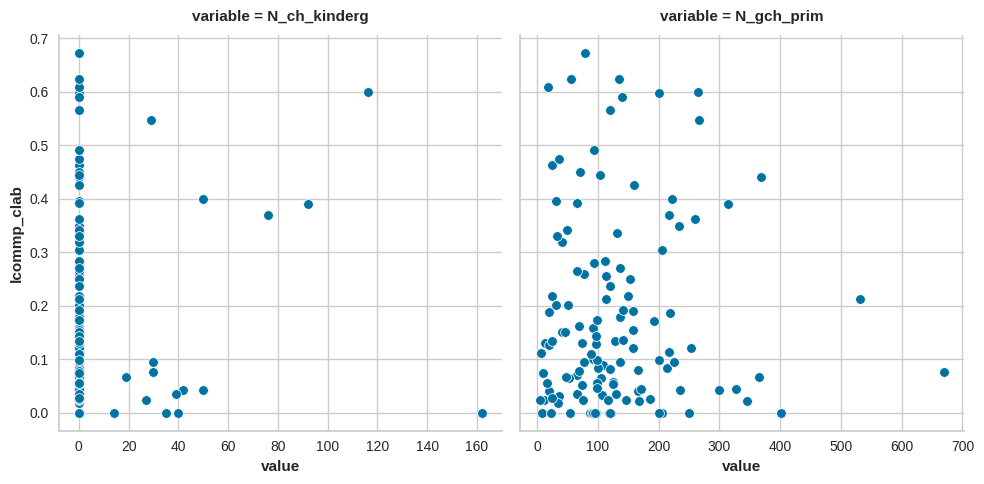

In [ ]:
features = data.columns.tolist()
sns.relplot(
    x="value", y="lcommp_clab", col="variable", data=data.melt(id_vars="lcommp_clab", value_vars=features[26:28]), facet_kws=dict(sharex=False),
);

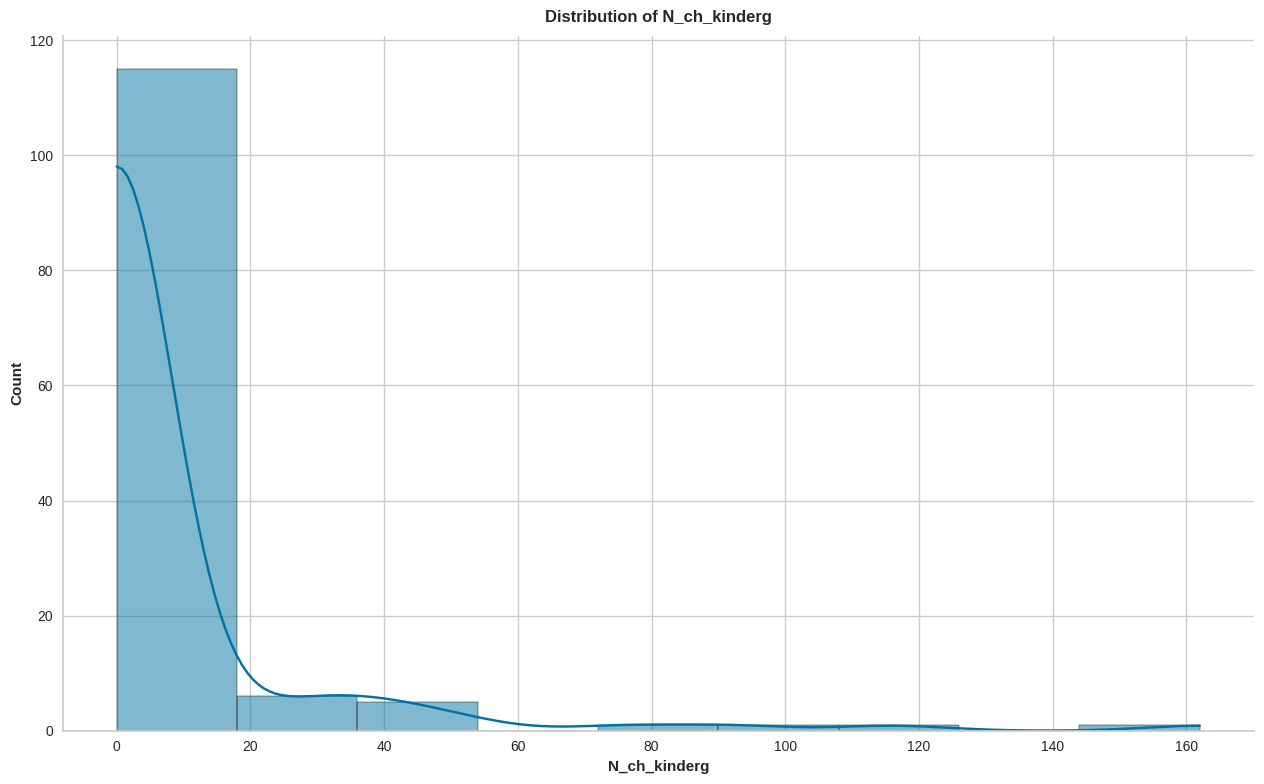

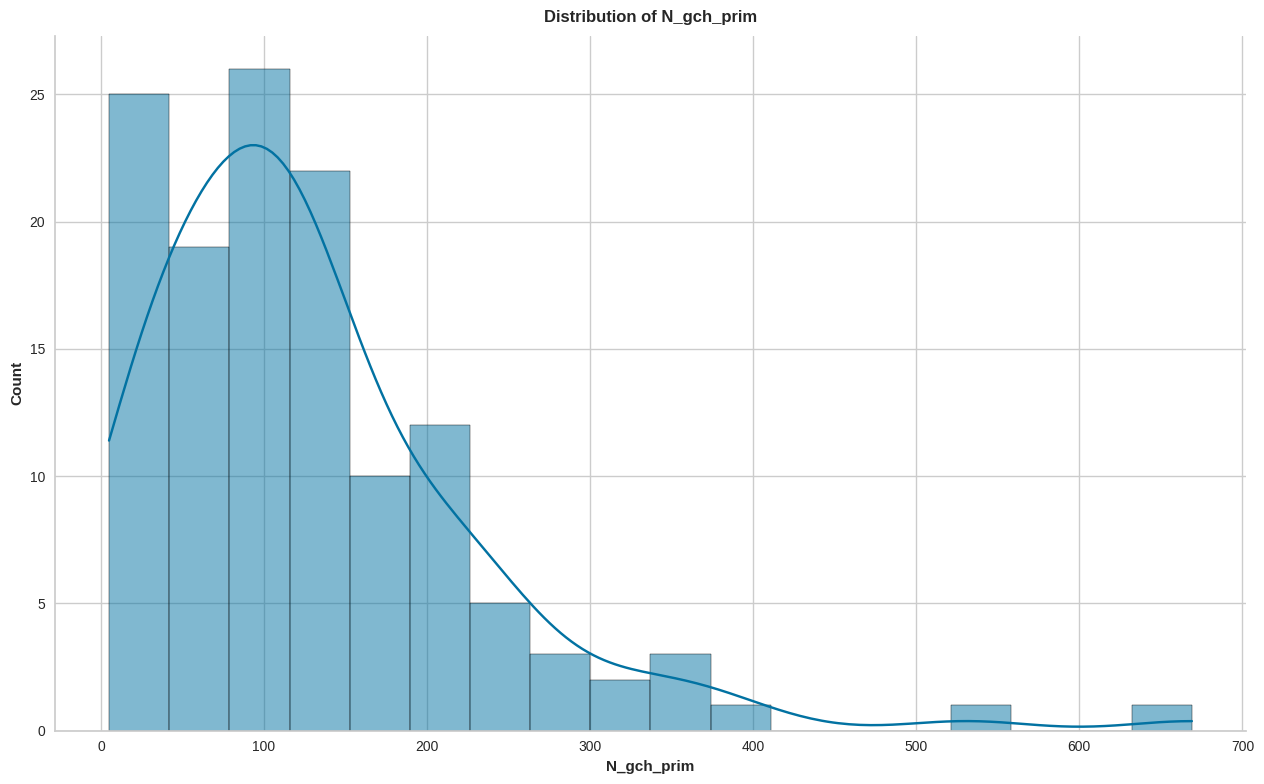

In [ ]:
plot_continuous_distribution(data, features[26:28], height= 8)

In [ ]:
X = data.copy()
y = X.pop('lcommp_clab')

mi_scores = make_mi_scores(X, y)
mi_scores.to_csv("scores.csv")

In [ ]:
selected_features = mi_scores.loc[mi_scores["MI Score"] != 0.0, "Feature"].tolist()

In [ ]:
selected_features.append('lcommp_clab')

health_secondary_d                               0.160872
shigh_d                                          0.157070
kinderg_d                                        0.147451
women_percchild05                                0.129109
CED_bdropout_prim1                               0.126269
district                                         0.125096
N_ch_voc                                         0.118892
men_edu                                          0.112738
N_bch_voc                                        0.108862
distance to nearest primary healthcare centre    0.098813
women_percliv                                    0.098556
N_gch_voc                                        0.092899
men_percread                                     0.091633
women_edu                                        0.089212
jhigh_d                                          0.086214
CED_N_bch_prim4                                  0.075064
primary_n                                        0.074658
CED_gattend_pr

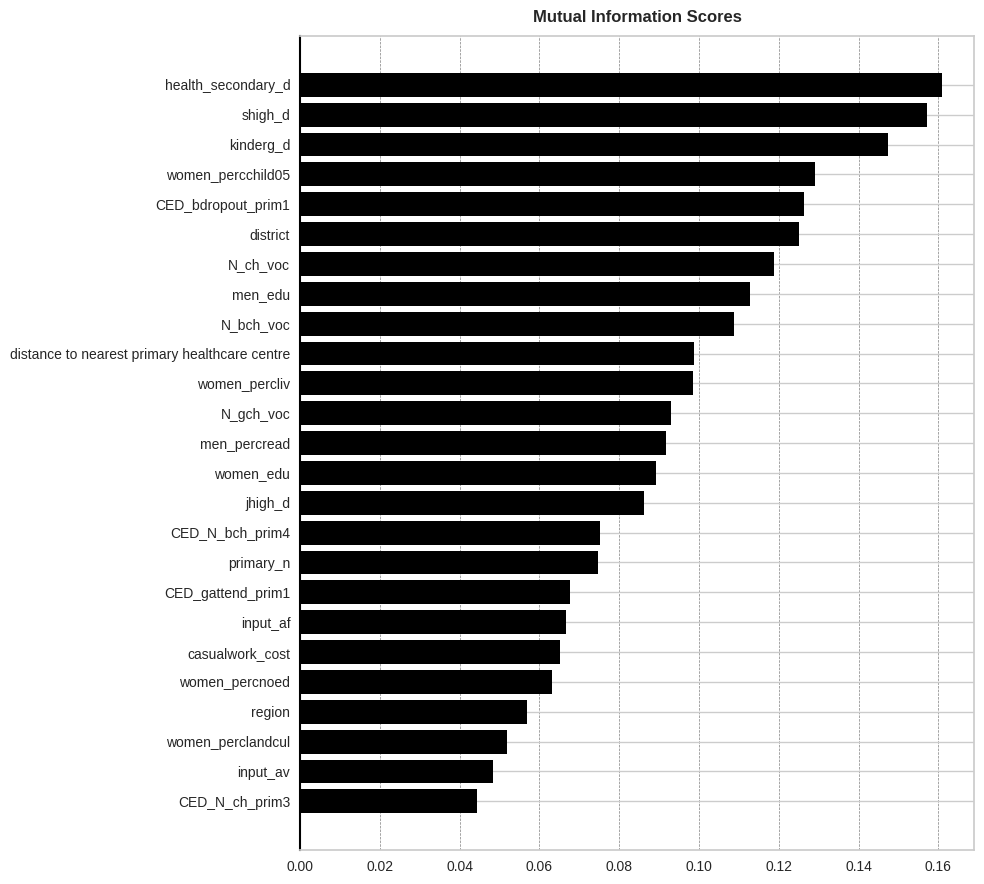

In [ ]:
print(mi_scores.head(20))

plt.figure(dpi=100, figsize=(10, 9))
plot_mi_scores(mi_scores.head(25))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

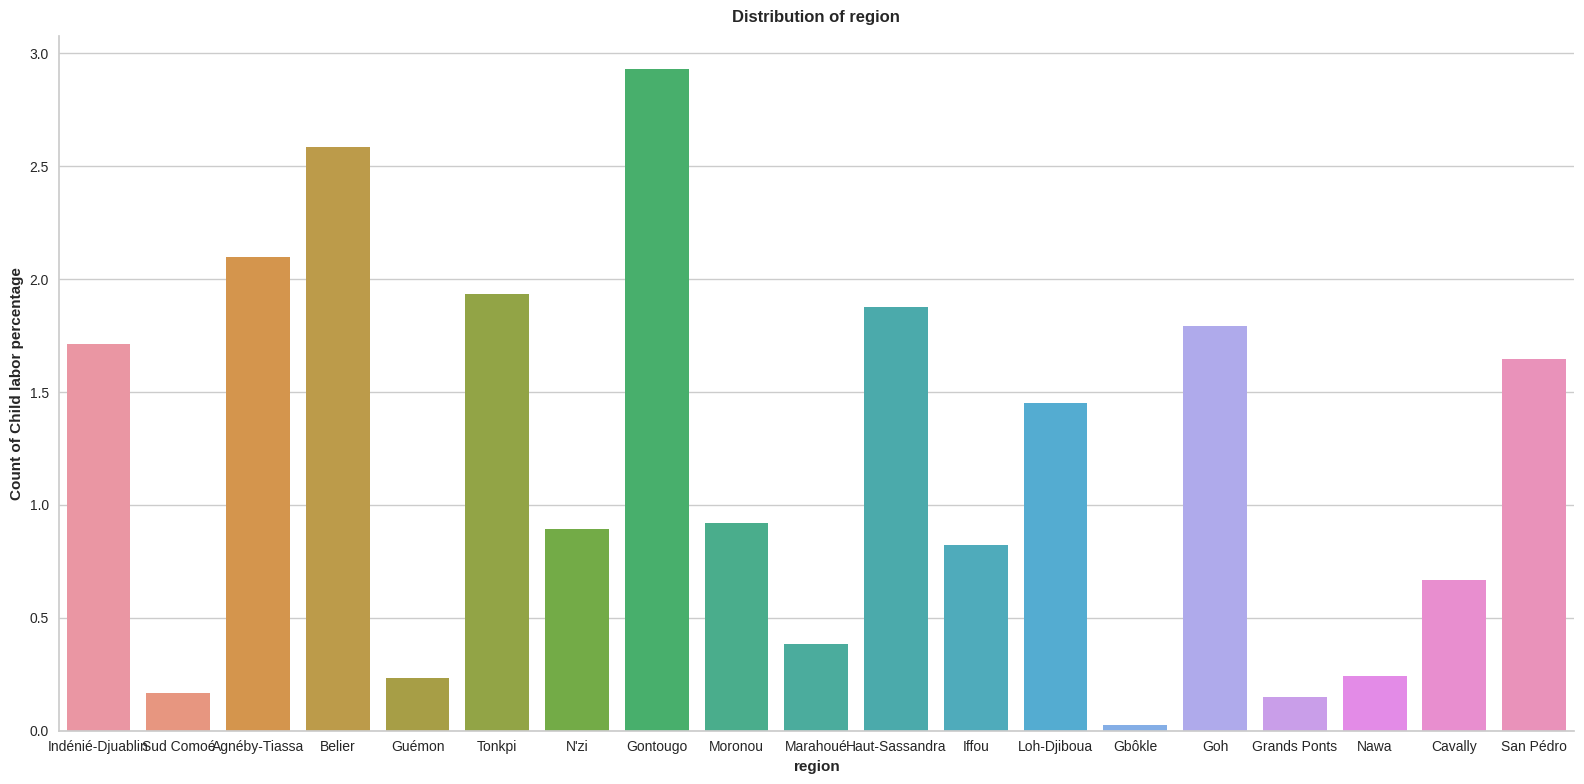

In [ ]:
def plot_categorical_distribution(df, x_col, count_column, height=8, aspect=2):
      _ = sns.catplot(data=df, x=x_col, y=count_column, kind='bar', estimator=sum, height=height, aspect=aspect, ci=None)
      _.set(title=f'Distribution of {x_col}')
      _.set_axis_labels(x_col, "Count of Child labor percentage")
plot_categorical_distribution(df, 'region', 'lcommp_clab')

Text(16.194444444444443, 0.5, 'Count of regions with Feeding programs')

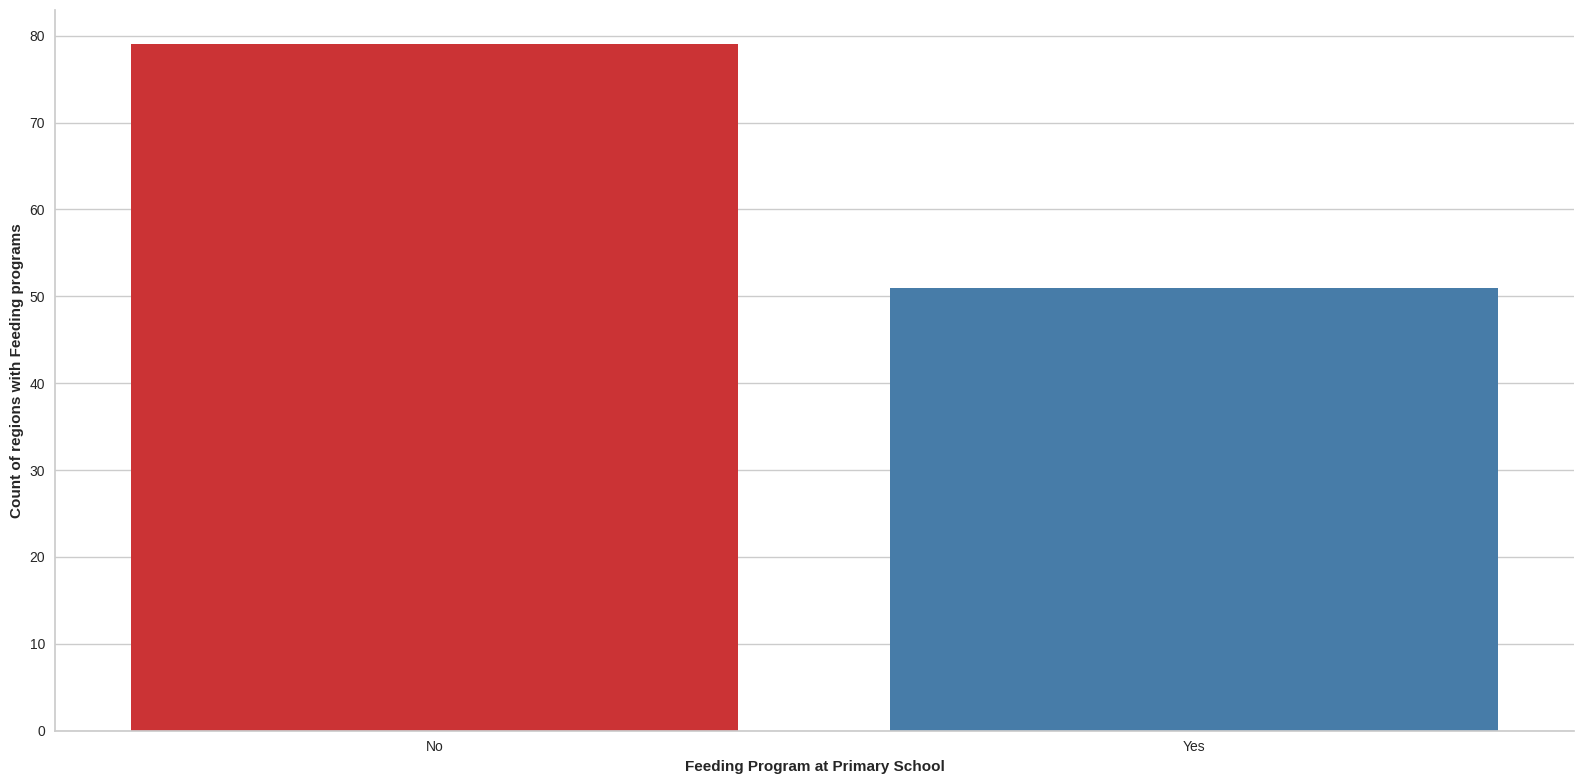

In [ ]:
def plot_categorical_distribution(data, column, height = 8, aspect = 2):
  for col in column:
    _ = sns.catplot(data=data, x=col, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {col}');

# plot_categorical_distribution(data, features[160:164], height = 8, aspect = 2)
sns.catplot(data=data, x='CED_feed_prim', kind='count', height=8, aspect=2, palette='Set1');
plt.xlabel('Feeding Program at Primary School')
plt.ylabel('Count of regions with Feeding programs')

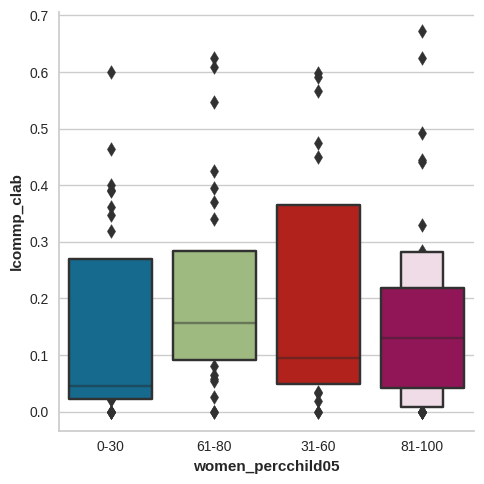

In [ ]:
sns.catplot(x="women_percchild05", y="lcommp_clab", data=data, kind="boxen");

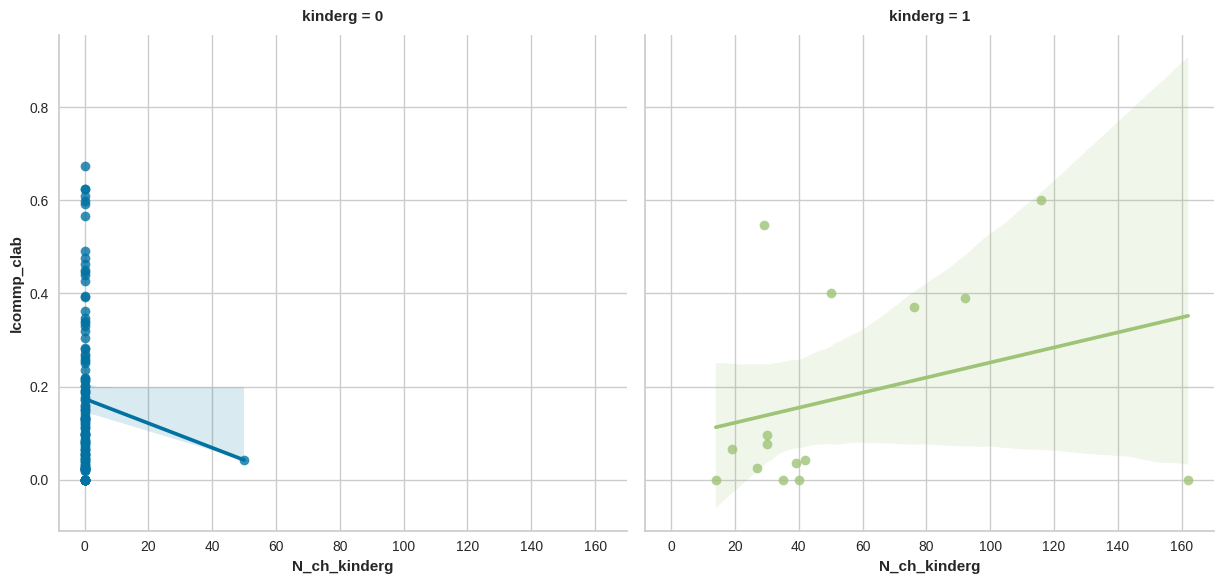

In [ ]:
feature = "N_ch_kinderg"

sns.lmplot(
    x=feature, y="lcommp_clab", hue="kinderg", col="kinderg",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=5, height=6,
);

In [ ]:
selected_features.insert(0, 'lcommp_clab')

In [ ]:
selected_dataset = data[selected_features[0:22]]##greater than 0.05
selected_dataset.head()

,lcommp_clab,health_secondary_d,shigh_d,kinderg_d,women_percchild05,CED_bdropout_prim1,district,N_ch_voc,men_edu,N_bch_voc,...,N_gch_voc,men_percread,women_edu,jhigh_d,CED_N_bch_prim4,primary_n,CED_gattend_prim1,input_af,casualwork_cost,women_percnoed
0,0.348307,0.0,22.0,17.0,0-30,0.50,Abengourou,0.0,Primary 4-6,0.0,...,0.0,0-30,Primary 4-6,22.0,51.0,2.0,99.500000,No,1600.0,0-30
1,0.395313,21.0,21.0,1.0,61-80,2.56,Abengourou,0.0,Primary 1-3,0.0,...,0.0,0-30,Primary 1-3,1.0,17.6,0.0,89.766000,No,1700.0,61-80
2,0.255933,19.0,19.0,19.0,31-60,0.00,Abengourou,0.0,Primary 4-6,0.0,...,0.0,0-30,Primary 4-6,19.0,24.0,1.0,100.000000,No,3000.0,61-80
3,0.150282,50.0,50.0,25.0,61-80,0.00,Abengourou,0.0,University,0.0,...,0.0,61-80,Junior High School,25.0,0.0,1.0,85.599998,No,2000.0,31-60
4,0.080043,3.0,3.0,3.0,0-30,10.00,Aboisso,0.0,Senior High School,0.0,...,0.0,61-80,Primary 4-6,3.0,37.0,1.0,96.000000,No,2000.0,0-30


### LINEAR REGRESSION

In [ ]:
# put the categorical variables into category type
categorical_columns = list(selected_dataset.dtypes[selected_dataset.dtypes == 'O'].index.values)

for column in categorical_columns:
    selected_dataset[column] = selected_dataset[column].astype('category')

In [ ]:
num_cols = selected_dataset.select_dtypes(include=['int', 'float']).columns.tolist()
cat_cols = selected_dataset.select_dtypes(include=["category"]).columns.tolist()

In [ ]:
num_cols.remove('lcommp_clab')

In [ ]:
X = selected_dataset.loc[:,selected_dataset.columns != 'lcommp_clab']
y = selected_dataset['lcommp_clab']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97, 21), (33, 21), (97,), (33,))

In [ ]:
# Preprocess data to create one-hot encoded features for categorical variables
X_num = X_train[num_cols]
X_cat = pd.get_dummies(X_train[cat_cols])
X = pd.concat([X_num, X_cat], axis=1)
y = y_train

# Fit an OLS model to the preprocessed data
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Print a summary of the fitted OLS model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            lcommp_clab   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     23.21
Date:                Sat, 27 May 2023   Prob (F-statistic):             0.0120
Time:                        08:00:23   Log-Likelihood:                 345.24
No. Observations:                  97   AIC:                            -502.5
Df Residuals:                       3   BIC:                            -260.5
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [ ]:

# Select variables with p-values less than 0.05
significant_vars = results.pvalues[results.pvalues < 0.05].index.tolist()

# Print the list of significant variables
m = pd.DataFrame(significant_vars)
m.head(20)

,0
0,shigh_d
1,kinderg_d
2,N_gch_voc
3,women_percchild05_31-60
4,women_percchild05_61-80
5,district_Agboville
6,district_Alépé
7,district_Attiégouakro
8,district_Bangolo
9,district_Bocanda


In [ ]:
# Fit an OLS model
model = sm.OLS(y, X)
results = model.fit()

# Filter the rows based on p-values
summary = results.summary()
summary_df = pd.read_html(summary.tables[1].as_html(), header=0, index_col=0)[0]
filtered_summary_df = summary_df[summary_df['P>|t|'] < 0.05]

# Export filtered summary table to a LaTeX file
with open('filtered_summary.tex', 'w') as f:
    f.write(filtered_summary_df.to_latex())


In [ ]:
summary_df = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0]
summary_df.to_csv('summary.csv')

In [ ]:
filtered_summary_df.head(200)

,coef,std err,t,P>|t|,[0.025,0.975]
kinderg_d,-1.380000e-02,2.000000e-03,-6.159,0.009,-2.100000e-02,-7.000000e-03
N_gch_voc,1.830000e-02,6.000000e-03,3.240,0.048,0.000000e+00,3.600000e-02
women_percchild05_31-60,2.550000e-01,6.000000e-02,4.285,0.023,6.600000e-02,4.440000e-01
women_percchild05_61-80,-1.279000e-01,3.300000e-02,-3.829,0.031,-2.340000e-01,-2.200000e-02
district_Agboville,-1.069000e-15,2.580000e-16,-4.139,0.026,-1.890000e-15,-2.470000e-16
district_Alépé,-4.720000e-01,1.120000e-01,-4.214,0.024,-8.290000e-01,-1.160000e-01
district_Attiégouakro,2.570000e-01,7.200000e-02,3.569,0.038,2.800000e-02,4.860000e-01
district_Bangolo,7.099000e-01,1.300000e-01,5.473,0.012,2.970000e-01,1.123000e+00
district_Bocanda,4.486000e-01,5.800000e-02,7.695,0.005,2.630000e-01,6.340000e-01
district_Bondoukou,-5.173000e-01,8.400000e-02,-6.161,0.009,-7.840000e-01,-2.500000e-01
